<a href="https://colab.research.google.com/github/mmonch/Sidecar_Project/blob/main/notebooks/Sidecar_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='Q0'></a>
<center><a target="_blank" href="https://sit.academy/"><img src="https://drive.google.com/uc?id=1z0U84GYqhbWWpCenFajh8_8XFRGyOc3U" width="200" style="background:none; border:none; box-shadow:none;" /></a> </center>
<center> <h1> Notebook 1: Sidecar Data Exploration </h1> </center>
<p style="margin-bottom:1cm;"></p>
<center><h4>SIT Academy, 2022</h4></center>
<p style="margin-bottom:1cm;"></p>

<div style="background:#EEEDF5;border-top:0.1cm solid #EF475B;border-bottom:0.1cm solid #EF475B;">
    <div style="margin-left: 0.5cm;margin-top: 0.5cm;margin-bottom: 0.5cm;color:#303030">
        <p><strong>Goal:</strong> Short description of the aim of the notebook</p>
        <strong> Outline:</strong>
        <a id='P0' name="P0"></a>
        <ol>
            <li> <a style="color:#303030" href='#I'>Introduction </a> </li>
            <li> <a style="color:#303030" href='#SU'>Set up</a></li>
            <li> <a style="color:#303030" href='#P1'>Part 1</a></li>
            <li> <a style="color:#303030" href='#P2'>Part 2</a></li>
            <li> <a style="color:#303030" href='#P3'>Part 3</a></li>
            <li> <a style="color:#303030" href='#CL'>Conclusion</a></li>
        </ol>
        <strong>Keywords:</strong> data cleaning, NLP, ... list of keywords.
    </div>
</div>
</nav>

<a id='I' name="I"></a>
## [Introduction](#P0)

Sources:

https://loeb.nyc/blog/data-science-word-expander
https://towardsdatascience.com/nlp-building-text-cleanup-and-preprocessing-pipeline-eba4095245a0
https://towardsdatascience.com/guide-to-fine-tuning-text-generation-models-gpt-2-gpt-neo-and-t5-dc5de6b3bc5e
https://www.machinecurve.com/index.php/2020/12/29/differences-between-autoregressive-autoencoding-and-sequence-to-sequence-models-in-machine-learning/

<a id='SU' name="SU"></a>
## [Set up](#P0)

### Magics

In [1]:
pip install nb_black

In [2]:
# auto reload packages and modules when they are modified
%load_ext autoreload
%autoreload 2
# draw matplotlib plots in line
%matplotlib inline
# enforce PEP 8 code on jupyter lab ...
#%load_ext lab_black
# ... or jupyter notebook
#%load_ext nb_black

# Colab setup ------------------
import os, sys, subprocess
if "google.colab" in sys.modules:
    cmd = "pip install --upgrade watermark blackcellmagic"
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)

%load_ext blackcellmagic

In [3]:
!pip install contractions

In [4]:
!pip install nltk>=3.2.1


### Packages

In [5]:
# General
import pandas as pd
import numpy as np

# modelling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import (
    CountVectorizer,
    TfidfTransformer,
    TfidfVectorizer,
)

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

import contractions
from bs4 import BeautifulSoup
import numpy as np
import re
import tqdm
import unicodedata

### Custom classes and functions

### Global Parameters Setting

In [6]:
plt.style.use("seaborn")

### User-Dependent Variables

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
data = pd.read_csv("gdrive/My Drive/SIDECAR_P/Sidecar_Data_Sample.csv")

<a id='P1'></a>
## [Part one](#P0)

Here you could write a paragraph on the aim of part one. You could also have some nice figures



In [9]:
#%load_ext google.colab.data_table

data


,Domain_Id,Domain_Name,Domain_Desc,Domain_Code,Domain_Status,Domain_Status_Code,Application_Id,Application_Name,Application_Code,Application_Desc,Application_Status,Application_Status_Code,Asset_Id,Asset_Technical_Name,Asset_Business_Name,Asset_Business_Desc,Asset_Status,Asset_Status_Code,Asset_Server_Name,Asset_Database,Asset_Schema,Asset_Type_Id,Asset_Type_Name,Asset_Type_Desc,Privacy_Level_Id,Asset_Privacy_Level,Asset_Privacy_Desc,Attribute_Id,Attribute_Technical_Name,Attribute_Business_Name,Attribute_Business_Desc,Attribute_Business_Rule,Attribute_Data_Type,Attribute_IsPK,Attribute_IsNullable,Attribute_Status,Attribute_Status_Code
0,1,Patient administrative,Patient administrative data (demographic & adm...,PAT_ADM,Active,1,1,Patient Manager,PATMAN,Patient Manager tool is the application allowi...,Active,1,1,PMS_PT,Patient,Patient table Contain personal information abo...,Active,1,SWT01_PRD,PMS,dbo,1,Table,Database table,4,Level 4 - Highly sensitive,Highly sensitive - Internal use,1,ID,Technical Id of the patient,The Primary Key (surrogate unique identifier) ...,NaN,NUMBER (38),Yes,Yes,Active,1
1,1,Patient administrative,Patient administrative data (demographic & adm...,PAT_ADM,Active,1,1,Patient Manager,PATMAN,Patient Manager tool is the application allowi...,Active,1,1,PMS_PT,Patient,Patient table Contain personal information abo...,Active,1,SWT01_PRD,PMS,dbo,1,Table,Database table,4,Level 4 - Highly sensitive,Highly sensitive - Internal use,2,GNDR_CD,Gender Code,Code of GENDER CODE defined as: The gender of ...,"If Gender code = M then Male, F = Female, or U...",VARCHAR2 (80),No,No,Active,1
2,1,Patient administrative,Patient administrative data (demographic & adm...,PAT_ADM,Active,1,1,Patient Manager,PATMAN,Patient Manager tool is the application allowi...,Active,1,1,PMS_PT,Patient,Patient table Contain personal information abo...,Active,1,SWT01_PRD,PMS,dbo,1,Table,Database table,4,Level 4 - Highly sensitive,Highly sensitive - Internal use,3,LIVG_ARNGMNT_CD,Living arrangement,Code of LIVING ARRANGEMENT CODE defined as: A ...,NaN,VARCHAR2 (80),No,No,Active,1
3,1,Patient administrative,Patient administrative data (demographic & adm...,PAT_ADM,Active,1,1,Patient Manager,PATMAN,Patient Manager tool is the application allowi...,Active,1,1,PMS_PT,Patient,Patient table Contain personal information abo...,Active,1,SWT01_PRD,PMS,dbo,1,Table,Database table,4,Level 4 - Highly sensitive,Highly sensitive - Internal use,4,MRTL_STUS_CD,Marital status code,Code of MARITAL STATUS CODE defined as: Party'...,NaN,VARCHAR2 (80),No,No,Active,1
4,1,Patient administrative,Patient administrative data (demographic & adm...,PAT_ADM,Active,1,1,Patient Manager,PATMAN,Patient Manager tool is the application allowi...,Active,1,1,PMS_PT,Patient,Patient table Contain personal information abo...,Active,1,SWT01_PRD,PMS,dbo,1,Table,Database table,4,Level 4 - Highly sensitive,Highly sensitive - Internal use,5,OCUPATN_CD,Occupation code,Code of OCCUPATION CODE defined as: The occupa...,NaN,VARCHAR2 (80),No,No,Active,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,7,ICT,ICT department,ICT,Active,1,15,sidecar,SIDECAR,sidecar is metadata management system.,Active,1,106,Config_AssetList,Configuration asset list,Contains all the required parameters to launch...,Active,1,DESKTOP-5JVNT8I,sidecar_Dev,dbo,1,Table,Database table,-1,Not defined,-,4456,Config_AssetList_Data_Source,Config AssetList Data Source,Data source for the scan,NaN,nvarchar (64),No,Yes,Active,1
4129,7,ICT,ICT department,ICT,Active,1,15,sidecar,SIDECAR,sidecar is metadata management system.,Active,1,87,Attribute,Attribute,Contains the list of attributes that character...,Active,1,DESKTOP-5JVNT8I,sidecar_Dev,dbo,1,Table,Database table,-1,Not defined,-,4457,Attribute_Sample_Data,Attribute sample data,Sample data of the attribute.,NaN,nvarchar (MAX),No,Yes,Active,1
4130,7,ICT,ICT department,I

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133 entries, 0 to 4132
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Domain_Id                 4133 non-null   int64 
 1   Domain_Name               4133 non-null   object
 2   Domain_Desc               4133 non-null   object
 3   Domain_Code               4133 non-null   object
 4   Domain_Status             4133 non-null   object
 5   Domain_Status_Code        4133 non-null   int64 
 6   Application_Id            4133 non-null   int64 
 7   Application_Name          4133 non-null   object
 8   Application_Code          4133 non-null   object
 9   Application_Desc          4133 non-null   object
 10  Application_Status        4133 non-null   object
 11  Application_Status_Code   4133 non-null   int64 
 12  Asset_Id                  4133 non-null   int64 
 13  Asset_Technical_Name      4133 non-null   object
 14  Asset_Business_Name     

In [11]:
data.describe()

,Domain_Id,Domain_Status_Code,Application_Id,Application_Status_Code,Asset_Id,Asset_Status_Code,Asset_Type_Id,Privacy_Level_Id,Attribute_Id,Attribute_Status_Code
count,4133.000000,4133.0,4133.000000,4133.0,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000
mean,7.288168,1.0,32.568836,1.0,217.097992,1.008226,1.189451,-0.331720,2173.253327,1.009436
std,3.175863,0.0,19.112937,0.0,129.265674,0.128020,0.391914,1.417479,1294.975998,0.136184
min,1.000000,1.0,1.000000,1.0,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000
25%,7.000000,1.0,15.000000,1.0,109.000000,1.000000,1.000000,-1.000000,1039.000000,1.000000
50%,7.000000,1.0,25.000000,1.0,222.000000,1.000000,1.000000,-1.000000,2145.000000,1.000000
75%,7.000000,1.0,52.000000,1.0,320.000000,1.000000,1.000000,-1.000000,3195.000000,1.000000
max,19.000000,1.0,56.000000,1.0,428.000000,3.000000,2.000000,4.000000,4460.000000,3.000000


In [12]:
data.isnull().any()

Domain_Id                   False
Domain_Name                 False
Domain_Desc                 False
Domain_Code                 False
Domain_Status               False
Domain_Status_Code          False
Application_Id              False
Application_Name            False
Application_Code            False
Application_Desc            False
Application_Status          False
Application_Status_Code     False
Asset_Id                    False
Asset_Technical_Name        False
Asset_Business_Name         False
Asset_Business_Desc          True
Asset_Status                False
Asset_Status_Code           False
Asset_Server_Name           False
Asset_Database              False
Asset_Schema                False
Asset_Type_Id               False
Asset_Type_Name             False
Asset_Type_Desc             False
Privacy_Level_Id            False
Asset_Privacy_Level         False
Asset_Privacy_Desc          False
Attribute_Id                False
Attribute_Technical_Name    False
Attribute_Busi

In [13]:
is_na = data[data.isna().any(axis=1)]

In [14]:
len(is_na)

3792

In [15]:
is_na.tail()

,Domain_Id,Domain_Name,Domain_Desc,Domain_Code,Domain_Status,Domain_Status_Code,Application_Id,Application_Name,Application_Code,Application_Desc,Application_Status,Application_Status_Code,Asset_Id,Asset_Technical_Name,Asset_Business_Name,Asset_Business_Desc,Asset_Status,Asset_Status_Code,Asset_Server_Name,Asset_Database,Asset_Schema,Asset_Type_Id,Asset_Type_Name,Asset_Type_Desc,Privacy_Level_Id,Asset_Privacy_Level,Asset_Privacy_Desc,Attribute_Id,Attribute_Technical_Name,Attribute_Business_Name,Attribute_Business_Desc,Attribute_Business_Rule,Attribute_Data_Type,Attribute_IsPK,Attribute_IsNullable,Attribute_Status,Attribute_Status_Code
4128,7,ICT,ICT department,ICT,Active,1,15,sidecar,SIDECAR,sidecar is metadata management system.,Active,1,106,Config_AssetList,Configuration asset list,Contains all the required parameters to launch...,Active,1,DESKTOP-5JVNT8I,sidecar_Dev,dbo,1,Table,Database table,-1,Not defined,-,4456,Config_AssetList_Data_Source,Config AssetList Data Source,Data source for the scan,NaN,nvarchar (64),No,Yes,Active,1
4129,7,ICT,ICT department,ICT,Active,1,15,sidecar,SIDECAR,sidecar is metadata management system.,Active,1,87,Attribute,Attribute,Contains the list of attributes that character...,Active,1,DESKTOP-5JVNT8I,sidecar_Dev,dbo,1,Table,Database table,-1,Not defined,-,4457,Attribute_Sample_Data,Attribute sample data,Sample data of the attribute.,NaN,nvarchar (MAX),No,Yes,Active,1
4130,7,ICT,ICT department,ICT,Active,1,15,sidecar,SIDECAR,sidecar is metadata management system.,Active,1,81,Property,Custom properties,This table contains the all custom properties ...,Active,1,DESKTOP-5JVNT8I,sidecar_Dev,dbo,1,Table,Database table,-1,Not defined,-,4458,Property_IsDQ,Property IsDQ,Flag that indicates if the property is a data ...,NaN,bit,No,Yes,Active,1
4131,7,ICT,ICT department,ICT,Active,1,15,sidecar,SIDECAR,sidecar is metadata management system.,Active,1,81,Property,Custom properties,This table contains the all custom properties ...,Active,1,DESKTOP-5JVNT8I,sidecar_Dev,dbo,1,Table,Database table,-1,Not defined,-,4459,Property_DQ_Calculation,Property DQ Calculation,Data quality calculation of the custom property,NaN,varchar (50),No,Yes,Active,1
4132,7,ICT,ICT department,ICT,Active,1,15,sidecar,SIDECAR,sidecar is metadata management system.,Active,1,81,Property,Custom properties,This table contains the all custom properties ...,Active,1,DESKTOP-5JVNT8I,sidecar_Dev,dbo,1,Table,Database table,-1,Not defined,-,4460,Property_DQ_Output_Format,Property DQ Output Format,Data quality output format of the custom property,NaN,varchar (20),No,Yes,Active,1


In [16]:
np.sort(data["Asset_Id"].unique())

array([  1,   2,   3,   4,   5,   9,  10,  11,  13,  15,  16,  17,  18,
        19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  31,  34,
        38,  40,  41,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 150, 151,
       152, 153, 154, 155, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 20

In [17]:
# how many values per column, value_counts() per feature
# plot distributions barplot or histogramm
for col in data.columns:
  print (f"Column Name, Number of unique values: \n{col}, {data[col].nunique()}\nValue Counts: \n{data[col].value_counts()}\n\n----------------------")

Column Name, Number of unique values: 
Domain_Id, 8
Value Counts: 
7     2700
11     508
1      302
12     269
2      258
19      60
14      22
10      14
Name: Domain_Id, dtype: int64

----------------------
Column Name, Number of unique values: 
Domain_Name, 8
Value Counts: 
ICT                            2700
Clinical Research               508
Patient administrative          302
 Humanitarian Data Exchange     269
Biobank                         258
Master Data                      60
Insurance                        22
Infectious Diseases              14
Name: Domain_Name, dtype: int64

----------------------
Column Name, Number of unique values: 
Domain_Desc, 8
Value Counts: 
ICT department                                                                                                                                                                                                                                                                                                       

In [18]:
data["Attribute_Technical_Name"].value_counts()

ModifiedDate                  73
LastEditedBy                  49
SYS_LastModified              49
SYS_LastModifiedBy            46
ValidTo                       38
                              ..
RELIGION_CD                    1
P_AF189333                     1
DAT_SRC_NUM_ID                 1
P_AF189309                     1
drug_exposure_end_datetime     1
Name: Attribute_Technical_Name, Length: 1998, dtype: int64

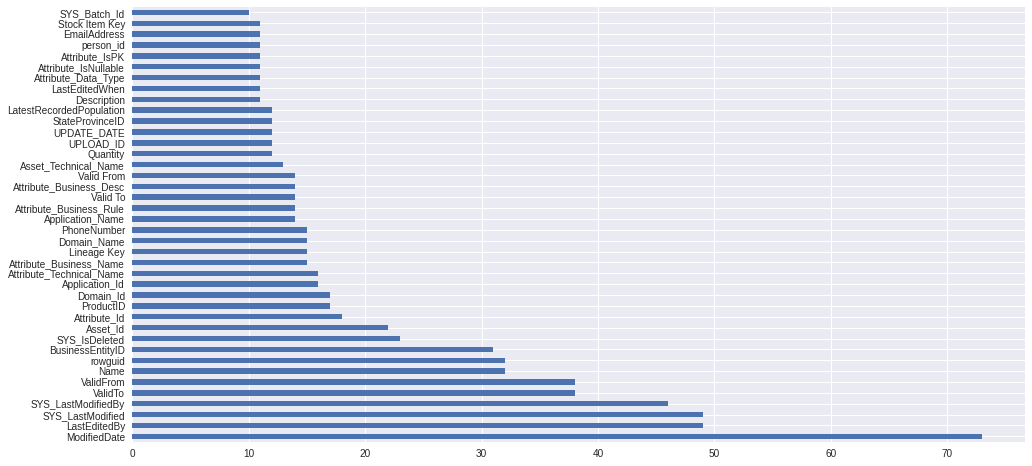

In [64]:
data["Attribute_Technical_Name"].value_counts()[:40].plot(kind="barh")
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.show()

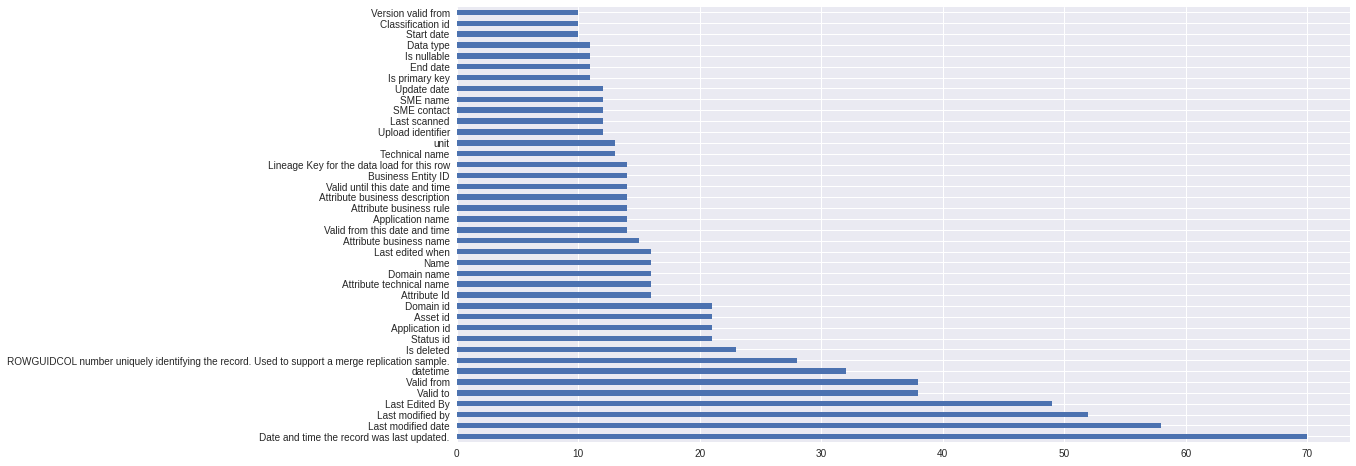

In [63]:
data["Attribute_Business_Name"].value_counts()[:40].plot(kind="barh")
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.show()

In [21]:
data["Attribute_Technical_Name"].astype(str)

0                                 ID
1                            GNDR_CD
2                    LIVG_ARNGMNT_CD
3                       MRTL_STUS_CD
4                         OCUPATN_CD
                    ...             
4128    Config_AssetList_Data_Source
4129           Attribute_Sample_Data
4130                   Property_IsDQ
4131         Property_DQ_Calculation
4132       Property_DQ_Output_Format
Name: Attribute_Technical_Name, Length: 4133, dtype: object

### Exploring Basic Models

First we will try to generate the Business Name from the technical name, which should be a relatively straightforward problem. 

There are two basic approaches we can try. 

1. Similarity-based Model
2. Rule-based Model

Text preprocessing:
- try removing contractions (last step)
- strip whitespaces
- remove underscores
- evtl. remove numbers (if it makes sense, for some data sets that might be a terrible idea --> genetic data/loci information etc.)
- remove accentuation
- remove special characters
- evtl. remove punctuation
- is lemmatization possible?
- remove tabs (if there even are any)
- change everything to lowercase
- IDEA: Use probabilistic word expansion [source](https://loeb.nyc/blog/data-science-word-expander) (Word_expander) to expand abbreviated technical names? Symspell 


In [22]:
# replace _ with space

In [23]:
# preprocess and normalize Text

# in case text not english
def remove_accented_chars(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

# preprocessing
def pre_process_text(labels):
  norm_docs = []
  for string in tqdm.tqdm(labels):
    string = string.replace("_", " ")
    string = string.translate(string.maketrans("\n\t\r", "   "))
    string = remove_accented_chars(string) 
    # and inset a space where a number follows a letter et vice versa
    string = re.sub(r'(?<=\d)(?=[^\d\s])|(?<=[^\d\s])(?=\d)', ' ', string)
    # insert space where an uppercase letter follows a lowercase letter
    string = re.sub(r"(?<![A-Z\W])(?=[A-Z])", " ", string)
    string = contractions.fix(string)
    # where XXXX number to XXXX number replace - with to IN PROGRESS
    string = string.replace("-", " to ")
    # remove special characters or whitespaces
    string = re.sub(r"[^a-zA-Z0-9\s]", "", string, flags=re.I|re.A)
    string = string.lower()
    string = string.strip()
    string = string.split(" ")
    norm_docs.append(string)
  return norm_docs

In [24]:
list1 = ["PAF1234567","ABC123553", "hep3", "obsolete_3"]
pre_process_text(list1)

100%|██████████| 4/4 [00:00<00:00, 5633.72it/s]


[['paf', '1234567'], ['abc', '123553'], ['hep', '3'], ['obsolete', '3']]

In [25]:
data["Attribute_Technical_Name"]

0                                 ID
1                            GNDR_CD
2                    LIVG_ARNGMNT_CD
3                       MRTL_STUS_CD
4                         OCUPATN_CD
                    ...             
4128    Config_AssetList_Data_Source
4129           Attribute_Sample_Data
4130                   Property_IsDQ
4131         Property_DQ_Calculation
4132       Property_DQ_Output_Format
Name: Attribute_Technical_Name, Length: 4133, dtype: object

In [44]:
#paf = data[data['Attribute_Technical_Name'].str.startswith('P_AF')]
# data.Attribute_Technical_Name.str.startswith('Paf')
#data_no_paf = data[~data['Attribute_Technical_Name'].isin(['P_AF'])]
data_no_paf = data[data['Attribute_Technical_Name'].str.contains("P_AF")==False]

In [45]:
data_no_paf

,Domain_Id,Domain_Name,Domain_Desc,Domain_Code,Domain_Status,Domain_Status_Code,Application_Id,Application_Name,Application_Code,Application_Desc,Application_Status,Application_Status_Code,Asset_Id,Asset_Technical_Name,Asset_Business_Name,Asset_Business_Desc,Asset_Status,Asset_Status_Code,Asset_Server_Name,Asset_Database,Asset_Schema,Asset_Type_Id,Asset_Type_Name,Asset_Type_Desc,Privacy_Level_Id,Asset_Privacy_Level,Asset_Privacy_Desc,Attribute_Id,Attribute_Technical_Name,Attribute_Business_Name,Attribute_Business_Desc,Attribute_Business_Rule,Attribute_Data_Type,Attribute_IsPK,Attribute_IsNullable,Attribute_Status,Attribute_Status_Code
0,1,Patient administrative,Patient administrative data (demographic & adm...,PAT_ADM,Active,1,1,Patient Manager,PATMAN,Patient Manager tool is the application allowi...,Active,1,1,PMS_PT,Patient,Patient table Contain personal information abo...,Active,1,SWT01_PRD,PMS,dbo,1,Table,Database table,4,Level 4 - Highly sensitive,Highly sensitive - Internal use,1,ID,Technical Id of the patient,The Primary Key (surrogate unique identifier) ...,NaN,NUMBER (38),Yes,Yes,Active,1
1,1,Patient administrative,Patient administrative data (demographic & adm...,PAT_ADM,Active,1,1,Patient Manager,PATMAN,Patient Manager tool is the application allowi...,Active,1,1,PMS_PT,Patient,Patient table Contain personal information abo...,Active,1,SWT01_PRD,PMS,dbo,1,Table,Database table,4,Level 4 - Highly sensitive,Highly sensitive - Internal use,2,GNDR_CD,Gender Code,Code of GENDER CODE defined as: The gender of ...,"If Gender code = M then Male, F = Female, or U...",VARCHAR2 (80),No,No,Active,1
2,1,Patient administrative,Patient administrative data (demographic & adm...,PAT_ADM,Active,1,1,Patient Manager,PATMAN,Patient Manager tool is the application allowi...,Active,1,1,PMS_PT,Patient,Patient table Contain personal information abo...,Active,1,SWT01_PRD,PMS,dbo,1,Table,Database table,4,Level 4 - Highly sensitive,Highly sensitive - Internal use,3,LIVG_ARNGMNT_CD,Living arrangement,Code of LIVING ARRANGEMENT CODE defined as: A ...,NaN,VARCHAR2 (80),No,No,Active,1
3,1,Patient administrative,Patient administrative data (demographic & adm...,PAT_ADM,Active,1,1,Patient Manager,PATMAN,Patient Manager tool is the application allowi...,Active,1,1,PMS_PT,Patient,Patient table Contain personal information abo...,Active,1,SWT01_PRD,PMS,dbo,1,Table,Database table,4,Level 4 - Highly sensitive,Highly sensitive - Internal use,4,MRTL_STUS_CD,Marital status code,Code of MARITAL STATUS CODE defined as: Party'...,NaN,VARCHAR2 (80),No,No,Active,1
4,1,Patient administrative,Patient administrative data (demographic & adm...,PAT_ADM,Active,1,1,Patient Manager,PATMAN,Patient Manager tool is the application allowi...,Active,1,1,PMS_PT,Patient,Patient table Contain personal information abo...,Active,1,SWT01_PRD,PMS,dbo,1,Table,Database table,4,Level 4 - Highly sensitive,Highly sensitive - Internal use,5,OCUPATN_CD,Occupation code,Code of OCCUPATION CODE defined as: The occupa...,NaN,VARCHAR2 (80),No,No,Active,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,7,ICT,ICT department,ICT,Active,1,15,sidecar,SIDECAR,sidecar is metadata management system.,Active,1,106,Config_AssetList,Configuration asset list,Contains all the required parameters to launch...,Active,1,DESKTOP-5JVNT8I,sidecar_Dev,dbo,1,Table,Database table,-1,Not defined,-,4456,Config_AssetList_Data_Source,Config AssetList Data Source,Data source for the scan,NaN,nvarchar (64),No,Yes,Active,1
4129,7,ICT,ICT department,ICT,Active,1,15,sidecar,SIDECAR,sidecar is metadata management system.,Active,1,87,Attribute,Attribute,Contains the list of attributes that character...,Active,1,DESKTOP-5JVNT8I,sidecar_Dev,dbo,1,Table,Database table,-1,Not defined,-,4457,Attribute_Sample_Data,Attribute sample data,Sample data of the attribute.,NaN,nvarchar (MAX),No,Yes,Active,1
4130,7,ICT,ICT department,I

In [46]:
prep_data = pre_process_text(data_no_paf["Attribute_Technical_Name"])

100%|██████████| 3941/3941 [00:00<00:00, 59537.50it/s]


In [47]:
prep_data

[['id'],
 ['gndr', 'cd'],
 ['livg', 'arngmnt', 'cd'],
 ['mrtl', 'stus', 'cd'],
 ['ocupatn', 'cd'],
 ['prmry', 'cse', 'of', 'dth', 'cd'],
 ['pt', 'stus', 'cd'],
 ['relgn', 'cd'],
 ['ttl', 'cd'],
 ['vet', 'stus', 'cd'],
 ['vip', 'cd'],
 ['bir', 'ord'],
 ['bir', 'plc'],
 ['frst', 'nm'],
 ['login', 'user', 'id'],
 ['lst', 'nm'],
 ['mid', 'nm'],
 ['mothrs', 'mdn', 'nm'],
 ['plc', 'of', 'dth', 'cit'],
 ['pt', 'nbr'],
 ['suf'],
 ['decd', 'flg'],
 ['bir', 'dt'],
 ['decd', 'dt'],
 ['email', 'ad'],
 ['checksum'],
 ['dat', 'src', 'num', 'id'],
 ['created', 'by', 'user', 'ds', 'num', 'id'],
 ['changed', 'by', 'user', 'ds', 'num', 'id'],
 ['src', 'biz', 'ky'],
 ['enterprise', 'id'],
 ['insert', 'dt'],
 ['src', 'eff', 'from', 'dt'],
 ['src', 'eff', 'to', 'dt'],
 ['correction', 'flg'],
 ['stg', 'id'],
 ['stg', 'gndr', 'cd'],
 ['stg', 'livg', 'arngmnt', 'cd'],
 ['stg', 'mrtl', 'stus', 'cd'],
 ['stg', 'ocupatn', 'cd'],
 ['stg', 'prmry', 'cse', 'of', 'dth', 'cd'],
 ['stg', 'pt', 'stus', 'cd'],
 ['stg', 

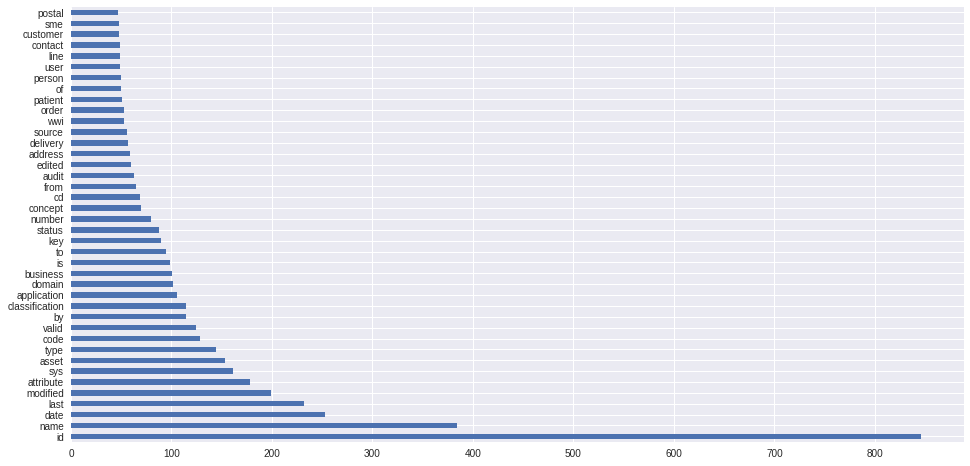

In [62]:
tech_word_list = sum(prep_data, [])
tech_word_series = pd.Series(tech_word_list)
tech_word_series.value_counts()[:40].plot(kind="barh")
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.show()

100%|██████████| 3941/3941 [00:00<00:00, 46653.76it/s]


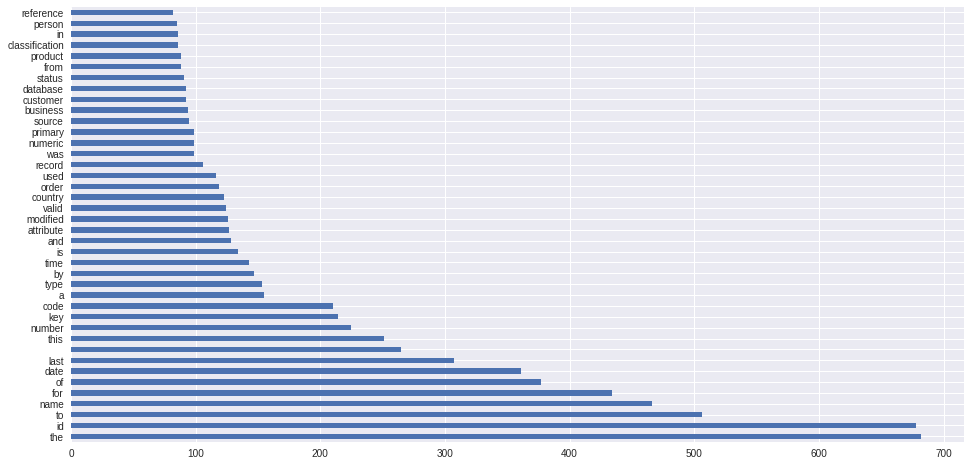

In [61]:
prep_busi_data= pre_process_text(data_no_paf["Attribute_Business_Name"])
business_word_list = sum(prep_busi_data, [])
business_word_series = pd.Series(business_word_list)
business_word_series.value_counts()[:40].plot(kind="barh")
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.show()

In [31]:
pip install git+https://github.com/NBCLab/abbr


  Cloning https://github.com/NBCLab/abbr to /tmp/pip-req-build-85tx9_7x
  Running command git clone -q https://github.com/NBCLab/abbr /tmp/pip-req-build-85tx9_7x


In [32]:
import abbr

In [33]:
from abbr import findall, expandall


In [34]:
#prep_data = " ".join(prep_data)
abbr_data= []
for string in prep_data:
  map_object = map(expandall, string)
  new_list = list(map_object)
  abbr_data.append(new_list) 


In [35]:
# abbr did nothing: BOO!
list_difference = [item for item in abbr_data if item not in prep_data]
list_difference

[]

In [36]:
# install autocorrect
!pip install autocorrect

     |████████████████████████████████| 622 kB 4.3 MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622382 sha256=c8530d405bb8dc11023db6905ca0a37ea6331beab7f781ea488c08313385d20c
  Stored in directory: /root/.cache/pip/wheels/54/d4/37/8244101ad50b0f7d9bffd93ce58ed7991ee1753b290923934b
Successfully built autocorrect


In [37]:
from autocorrect import Speller
# autocorrect will run faster as a numpy array

In [38]:
def autocorrect(doc):
  autocorr_doc = []
  spell = Speller() #spell(data)
  # use lambda function and list comprehension to loop over strings
  autocorr_text = [spell(x) for x in doc]
  autocorr_doc.append(autocorr_text)
  return autocorr_text #autocorr_doc

In [39]:
autocorrect(prep_data)


TypeError: ignored

<div style="background:#EEEDF5;color:#303030"><div style="margin-left: .2cm">
    <b>Comments:</b>
</div></div>

<div style="margin-left: 0.4cm">
    This Markdown cell is a template to write extended comments. e.g. explain the approach taken, or concepts behind algorithm chosen. Aim at having 2 lines at least. Anything smaller can be directly integrated in the code, or gathered together with other comments to form a bigger paragraph. Since this block is within a div element, you need to use html formatting syntax, not markdown
</div>

<div style="background:#EEEDF5;border:0.1cm solid #FDB100;color:#303030">
    <div style="margin: 0.2cm 0.2cm 0.2cm 0.2cm">
        <b style="color:#FDB100">Title:</b> 
        This is a an example yellow box
    </div>
</div>

<div style="background:#EEEDF5;border:0.1cm solid #00BAE5;color:#303030">
    <div style="margin: 0.2cm 0.2cm 0.2cm 0.2cm">
        <b style="color:#00BAE5">Note:</b>
        This is an example Blue Box
    </div>
</div>

<div style="background:#EEEDF5;border:0.1cm solid #EF475B;color:#303030">
    <div style="margin: 0.2cm 0.2cm 0.2cm 0.2cm">
        <b style="color:#EF475B">Warning:</b> 
        This is an example red box
    </div>
</div>

<a id='P2' name="P2"></a>
## [Part 2 title here](#P0)

<a id='P3' name="P3"></a>
## [Part 3 title here](#P0)

<a id='CL'></a>
## [Conclusion](#P0)

This is a pre-written conclusion in which we have nice figures.

<div style="border-top:0.1cm solid #EF475B"></div>
    <strong><a href='#Q0'><div style="text-align: right"> <h3>End of this Notebook.</h3></div></a></strong>